# implementation of word2vec from scratch

- it uses two sub-models (CBOW and Skip-gram)

  - CBOW: predicts the middle word based on surrounding context words

  - predicts words within a certain range before and after the current word in the same sentence

  

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import re
import numpy as np
from collections import Counter

In [ ]:
with open('/content/alice_in_wonderland.txt', 'r', encoding='utf-8') as file:
    text = file.read().lower()

In [ ]:
words = re.findall(r'\w+', text)
vocab = set(words)  # unique words

print(words)
print(len(vocab))

['chapter', 'i', 'down', 'the', 'rabbit', 'hole', 'alice', 'was', 'beginning', 'to', 'get', 'very', 'tired', 'of', 'sitting', 'by', 'her', 'sister', 'on', 'the', 'bank', 'and', 'of', 'having', 'nothing', 'to', 'do', 'once', 'or', 'twice', 'she', 'had', 'peeped', 'into', 'the', 'book', 'her', 'sister', 'was', 'reading', 'but', 'it', 'had', 'no', 'pictures', 'or', 'conversations', 'in', 'it', 'and', 'what', 'is', 'the', 'use', 'of', 'a', 'book', 'thought', 'alice', 'without', 'pictures', 'or', 'conversations', 'so', 'she', 'was', 'considering', 'in', 'her', 'own', 'mind', 'as', 'well', 'as', 'she', 'could', 'for', 'the', 'hot', 'day', 'made', 'her', 'feel', 'very', 'sleepy', 'and', 'stupid', 'whether', 'the', 'pleasure', 'of', 'making', 'a', 'daisy', 'chain', 'would', 'be', 'worth', 'the', 'trouble', 'of', 'getting', 'up', 'and', 'picking', 'the', 'daisies', 'when', 'suddenly', 'a', 'white', 'rabbit', 'with', 'pink', 'eyes', 'ran', 'close', 'by', 'her', 'there', 'was', 'nothing', 'so', '

In [ ]:
text = """Deep learning is a subset of machine learning that focuses on neural networks.
Neural networks consist of multiple layers that help computers recognize patterns in data.
Machine learning algorithms enable computers to improve their performance on tasks without explicit programming.
Natural language processing (NLP) is a field that applies machine learning to understand and generate human language.
Word embeddings, such as those produced by Word2Vec, capture semantic relationships between words.
"""


In [ ]:
text = text.lower()

words = re.findall(r'\w+', text)
vocab = set(words)

In [ ]:
print(words)
print(len(vocab))

['deep', 'learning', 'is', 'a', 'subset', 'of', 'machine', 'learning', 'that', 'focuses', 'on', 'neural', 'networks', 'neural', 'networks', 'consist', 'of', 'multiple', 'layers', 'that', 'help', 'computers', 'recognize', 'patterns', 'in', 'data', 'machine', 'learning', 'algorithms', 'enable', 'computers', 'to', 'improve', 'their', 'performance', 'on', 'tasks', 'without', 'explicit', 'programming', 'natural', 'language', 'processing', 'nlp', 'is', 'a', 'field', 'that', 'applies', 'machine', 'learning', 'to', 'understand', 'and', 'generate', 'human', 'language', 'word', 'embeddings', 'such', 'as', 'those', 'produced', 'by', 'word2vec', 'capture', 'semantic', 'relationships', 'between', 'words']
54


In [ ]:
text_to_idx = {word: i for i, word in enumerate(vocab)}
idx_to_text = {i: word for i, word in enumerate(vocab)}

In [ ]:
data = []
window_size = 2
for i in range(window_size, len(words) - window_size):
    target = text_to_idx[words[i]]
    context = [text_to_idx[words[i-j]] for j in range(1, window_size+1)]
    context.extend([text_to_idx[words[i+j]] for j in range(1, window_size+1)])
    for ctx in context:
        data.append((target, ctx))

In [ ]:
# Define model
class SkipGram(nn.Module):
    def __init__(self, vocab_size, embedding_dim):
        super(SkipGram, self).__init__()
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.output = nn.Linear(embedding_dim, vocab_size)

    def forward(self, x):
        embeds = self.embeddings(x)
        out = self.output(embeds)
        return out

In [ ]:
embedding_dim = 100
model = SkipGram(len(vocab), embedding_dim)
optimizer = optim.SGD(model.parameters(), lr=0.01)
loss_function = nn.CrossEntropyLoss()

In [ ]:
for epoch in range(100):
    total_loss = 0
    for target, context in data:
        target_tensor = torch.tensor([target], dtype=torch.long)
        context_tensor = torch.tensor([context], dtype=torch.long)

        model.zero_grad()
        log_probs = model(target_tensor)
        loss = loss_function(log_probs, context_tensor)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    if (epoch % 10 == 0):
      print(f"Epoch {epoch}, Loss: {total_loss}")


Epoch 0, Loss: 546.9163739681244
Epoch 10, Loss: 546.2480900287628
Epoch 20, Loss: 545.5851444005966
Epoch 30, Loss: 544.9403485059738
Epoch 40, Loss: 544.3107081651688
Epoch 50, Loss: 543.6939815282822
Epoch 60, Loss: 543.0884563922882
Epoch 70, Loss: 542.4927940368652
Epoch 80, Loss: 541.9059908390045
Epoch 90, Loss: 541.3271858692169


In [ ]:
# Get embeddings
embeddings = model.embeddings.weight.data.numpy()
word_vectors = {word: embeddings[text_to_idx[word]] for word in vocab}

In [ ]:
# View embedding for a specific word
print(f"Embedding for 'data': {word_vectors['data']}")

# Print vector dimensions
sample_word = list(vocab)[0]  # Get the first word from vocab
print(f"Vector dimension for {sample_word}: {word_vectors[sample_word].shape}")

Embedding for 'data': [-7.1843135e-01 -2.2600968e-01 -1.6916730e+00  8.8247198e-01
 -2.0642120e-01  8.8567448e-01  2.0169487e+00  1.2060392e+00
  1.6884754e+00  5.6314158e-01  7.1596235e-01 -2.4189699e-01
 -5.1512975e-01  2.1735869e-01 -1.2189833e+00 -7.7567279e-01
  1.6866077e-01  1.4164530e-01  2.1053618e-03 -1.2314379e+00
  1.5042980e+00  3.7028275e-02 -1.0655694e-01 -8.1753743e-01
  1.0496026e+00  1.4053030e+00  1.3752538e+00  3.9091092e-01
  9.0090823e-01  4.9502608e-01 -1.4657226e-01  6.6417038e-02
  1.3107337e+00 -9.4801462e-01 -1.4002708e+00 -1.3354437e+00
 -1.6172655e+00  8.5006899e-01 -1.0974500e+00 -4.8374882e-01
 -6.5086848e-01 -1.4188404e+00 -8.1289703e-01  1.9985427e-01
  6.6512215e-01 -2.6288268e-01 -5.5864221e-01  3.8977912e-01
  2.0379391e-01 -2.0546744e-02  6.8542385e-01 -6.3249016e-01
 -3.7887937e-01 -7.8521872e-01 -5.4881796e-02 -1.3759272e+00
  1.3981133e+00  3.4785634e-01  1.1114472e-01  5.1739788e-01
  7.2677851e-01 -8.1050801e-01 -7.8724080e-01 -3.6056656e-01
 -

Words most similar to 'data': [('neural', 0.21221566), ('recognize', 0.19027461), ('without', 0.18574952), ('nlp', 0.17957607), ('that', 0.1639663)]


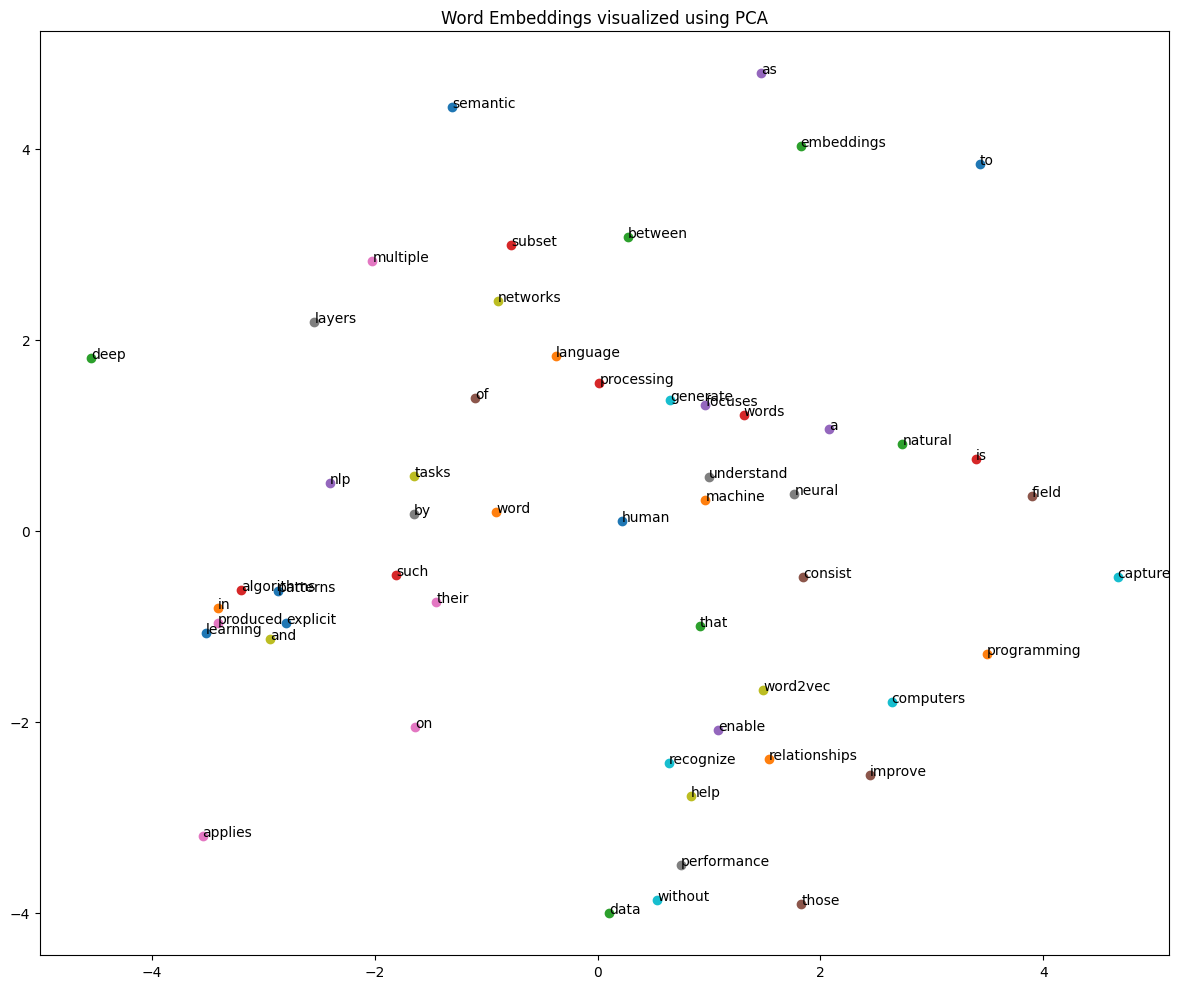

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

def cosine_similarity(vec1, vec2):
    return np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))

def find_similar_words(word, word_vectors, top_n=5):
    target_vector = word_vectors[word]
    similarities = {w: cosine_similarity(target_vector, wv)
                   for w, wv in word_vectors.items() if w != word}
    return sorted(similarities.items(), key=lambda x: x[1], reverse=True)[:top_n]

similar_words = find_similar_words('data', word_vectors)
print(f"Words most similar to 'data': {similar_words}")

def visualize_embeddings(word_vectors, words_to_plot=None, method='pca'):
    if words_to_plot is None:
        word_freq = Counter(words)
        words_to_plot = [w for w, _ in word_freq.most_common(min(100, len(vocab)))]

    vectors = np.array([word_vectors[w] for w in words_to_plot])
    reducer = PCA(n_components=2)

    reduced_vectors = reducer.fit_transform(vectors)

    # Plot
    plt.figure(figsize=(12, 10))
    for i, word in enumerate(words_to_plot):
        x, y = reduced_vectors[i]
        plt.scatter(x, y)
        plt.annotate(word, (x, y))

    plt.title(f"Word Embeddings visualized using {method.upper()}")
    plt.tight_layout()
    plt.show()

# Example usage
visualize_embeddings(word_vectors, method='pca')

In [ ]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 39.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 11.4 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1


In [ ]:
import gensim
from gensim.models import Word2Vec
import re

# Load and preprocess text
with open('/content/alice_in_wonderland.txt', 'r', encoding='utf-8') as file:
    text = file.read()

# Simple preprocessing
sentences = re.split(r'(?<=[.!?])\s+', text)
tokenized_sentences = [sentence.lower().split() for sentence in sentences]

# Train model
model = Word2Vec(sentences=tokenized_sentences,
                 vector_size=100,  # Embedding dimension
                 window=5,         # Context window size
                 min_count=1,      # Minimum word frequency
                 workers=4)        # Number of threads

# Save model
model.save("word2vec.model")

# Access word vectors
vector = model.wv['word']

# Find similar words
similar_words = model.wv.most_similar('word')

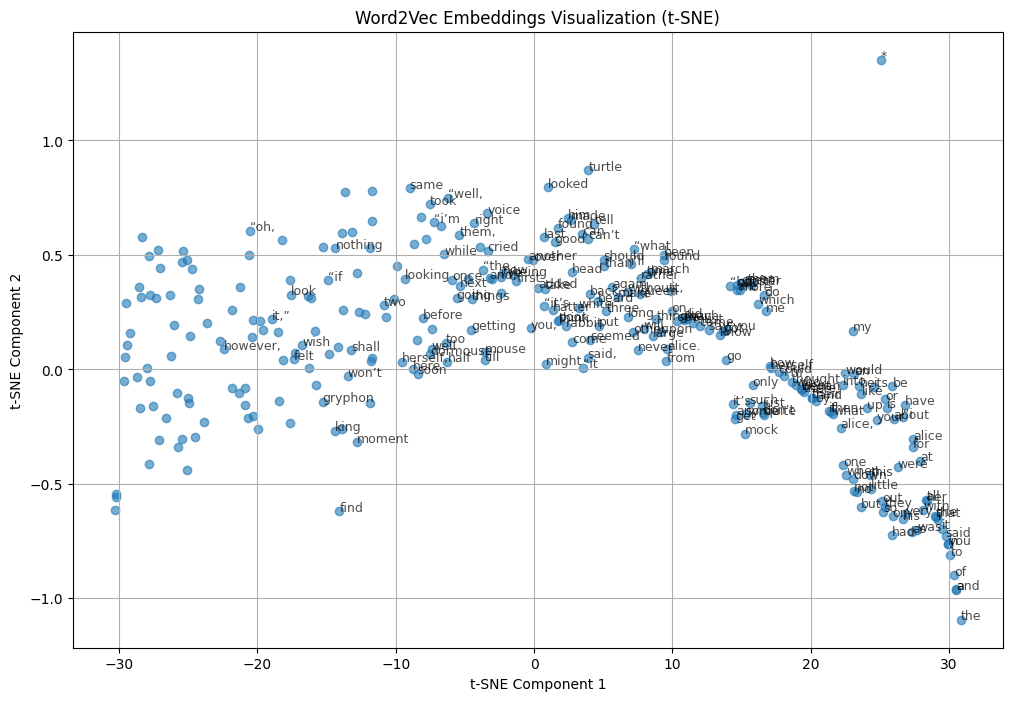

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Load trained model
model = Word2Vec.load("word2vec.model")

# Get vocabulary
words = list(model.wv.index_to_key)

# Retrieve word vectors
word_vectors = model.wv[words]

# Reduce dimensions using t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
word_vectors_2d = tsne.fit_transform(word_vectors[:300])  # Limit to first 200 words for clarity

# Plot word vectors
plt.figure(figsize=(12, 8))
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1], alpha=0.6)

# Annotate points
for i, word in enumerate(words[:200]):  # Show first 200 words
    plt.annotate(word, (word_vectors_2d[i, 0], word_vectors_2d[i, 1]), fontsize=9, alpha=0.7)

plt.title("Word2Vec Embeddings Visualization (t-SNE)")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.grid(True)
plt.show()
